<a href="https://colab.research.google.com/github/KFurudate/Midoribon/blob/main/chap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2章 確率分布と統計モデルの最尤推定

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [ ]:
data_dir = "/content/drive/My Drive/Midoribon/input/"
data =  pd.read_csv(os.path.join(data_dir, 'chap2_data.csv'))

In [ ]:
print(len(data))
data.head()

50


,Unnamed: 0,x
0,1,2
1,2,2
2,3,4
3,4,6
4,5,4


In [ ]:
data.describe()

,Unnamed: 0,x
count,50.00000,50.00000
mean,25.50000,3.56000
std,14.57738,1.72804
min,1.00000,0.00000
25%,13.25000,2.00000
50%,25.50000,3.00000
75%,37.75000,4.75000
max,50.00000,7.00000


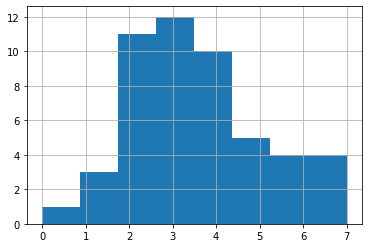

In [ ]:
data.x.hist(bins=8)

### ポアソン分布(Poisson distribution)でデータを統計モデルとして表現する

データの個体間のばらつきを近似的に表現するために、ポアソン分布を導入する。

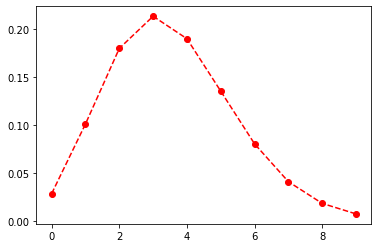

In [ ]:
#　平均3.56のポアソン分布
y = range(10)
x = stats.poisson.pmf(y, mu=3.56)
plt.plot(y, x, "ro--")
plt.show()

統計モデリングは、確率分布を使えば、ばらつきのある事象・現象を記述できる。

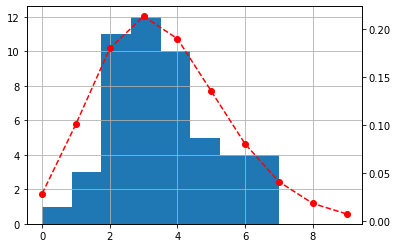

In [ ]:
fig,ax1=plt.subplots()
ax1 = data.x.hist(bins=8)
ax2 = ax1.twinx()
ax2.plot(y, x, "ro--")
plt.show()

### ポアソン分布のパラメーターの最尤推定

* 最尤推定は、得られたデータに対するあてはまりの良さ（尤度）を最大にするようなパラメーターの値を探そうとするパラメーター推定方法。
* 尤度は、パラメーターの関数。あるパラメーター（λ）を決めたときにすべての個体（i）の確率 Pr(i | λ)の積（同時確率）

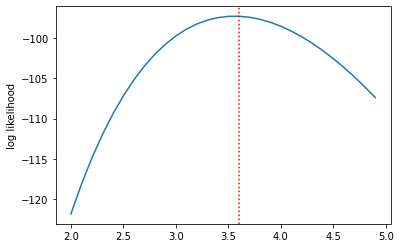

λ: 3.6　で対数尤度が最大（最尤推定値）


In [ ]:
X = np.arange(2, 5, 0.1)
logL = np.array([sum(stats.poisson.logpmf(data, x)) for x in X])
plt.plot(X, logL[:, 1])
plt.axvline(X[logL[:, 1].argmax()], color='red', linestyle='dotted')

plt.ylabel("log likelihood")
plt.show()
print(f"λ: {round(X[logL[:, 1].argmax()], 2)}　で対数尤度が最大（最尤推定値）")

### 擬似乱数と最尤推定値のばらつき

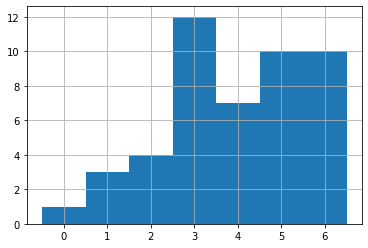

In [ ]:
# 平均3.56のポアソン分布から乱数を50個生成する

x = np.random.poisson(lam=3.56,　size=50)
x = pd.Series(x)

x.hist(bins=np.arange(x.max())-0.5)

In [ ]:
x.describe()

count    50.000000
mean      4.160000
std       1.811077
min       0.000000
25%       3.000000
50%       4.000000
75%       5.750000
max       8.000000
dtype: float64

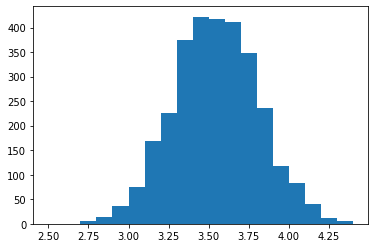

In [ ]:
# 平均3.56のポアソン乱数50個を生成し、3000回最尤推定値を求めたときのばらつき（標準誤差）
MEAN = 3.56
SIZE = 50
cnt = [np.random.poisson(lam=MEAN, size=SIZE).mean() for _ in range(3000)]
plt.hist(cnt, bins=np.arange(2.5, 4.5, 0.1))
plt.show()

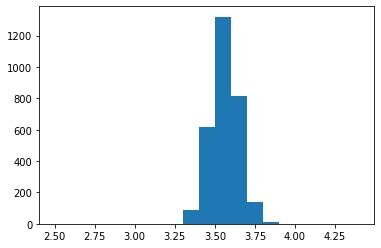

In [ ]:
# 平均3.56のポアソン乱数500個を生成し、3000回最尤推定値を求めたときのばらつき（標準誤差）
MEAN = 3.56
SIZE = 500
cnt = [np.random.poisson(lam=MEAN, size=SIZE).mean() for _ in range(3000)]
plt.hist(cnt, bins=np.arange(2.5, 4.5, 0.1))
plt.show()